# <center>Laboratory 5<br>Computing methods</center>

Instruction:
All the exercises from the laboratory must be implemented in [Spyder] (https://www.spyder-ide.org/). The report must be sent in [Jupyter Notebook] (https://jupyter-notebook.readthedocs.io/en/stable/)  

The aim of the course is to get acquainted with the numerical methods of solving differential equations ordinary. We will consider the differential equations of the form  
  
$$\dot{x}(t) = f(x(t), t)$$
where:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 

witch initial condition $x(0) = x0$  
  
Use the [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) feature using two methods **RK45** and * *RK23** solve the following examples:

***Exercise 1.***  
Solve the equation $\dot{x}(t)=\frac{x+t}{x-t}$, $x(0)=1$. The exact solution has the form  $x(t)=t+\sqrt{1+2t^2}$. Compare exact and numerical solutio.

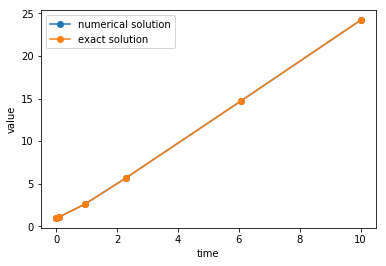

Text(0, 0.5, 'error value')

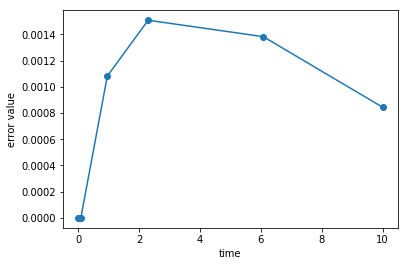

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
x0 = [1]
def exact(t):
    return t + np.sqrt(1+2*t**2)

def fun(t, x):
    return (x+t)/(x-t)

t_span = (0, 10)

numerical_solution = solve_ivp(fun, t_span, x0, method='RK45')
t = numerical_solution.t
y = numerical_solution.y[0]
plt.figure()
plt.plot(t, y, '-o')
plt.plot(t, exact(t), '-o')
plt.xlabel('time')
plt.ylabel('value')
plt.legend(['numerical solution', 'exact solution'])
plt.show()
error = np.abs(y - exact(t)) #L1 error
plt.figure()
plt.plot(t, error,'-o')
plt.xlabel('time')
plt.ylabel('error value')


***Exercise 2.***  
Solve the equation:  

$$\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}$$
      
for $x(0)=[1,0,0,1]^T$.
    
For that initial condition exact solution has form:  
$x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].$

Compare exact and numerical solutio.

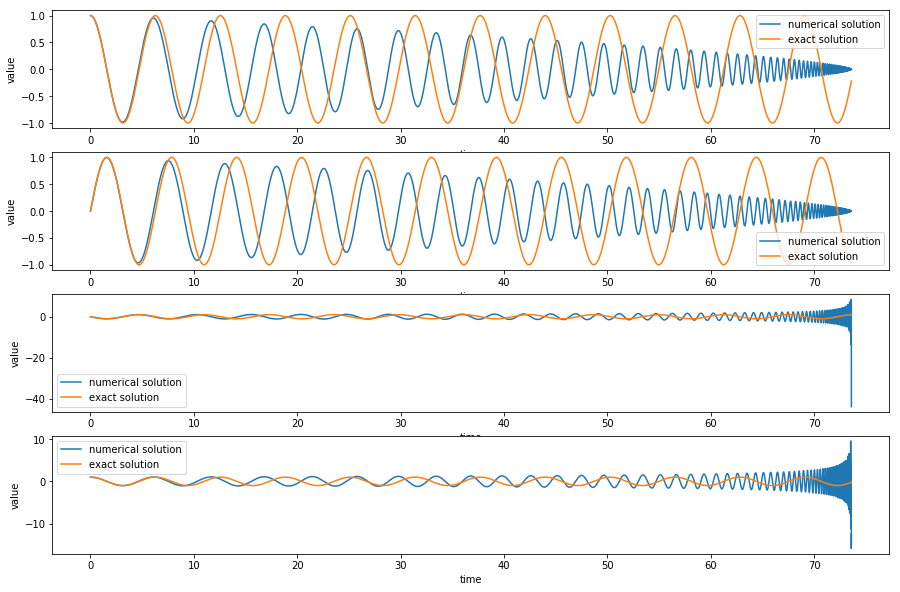

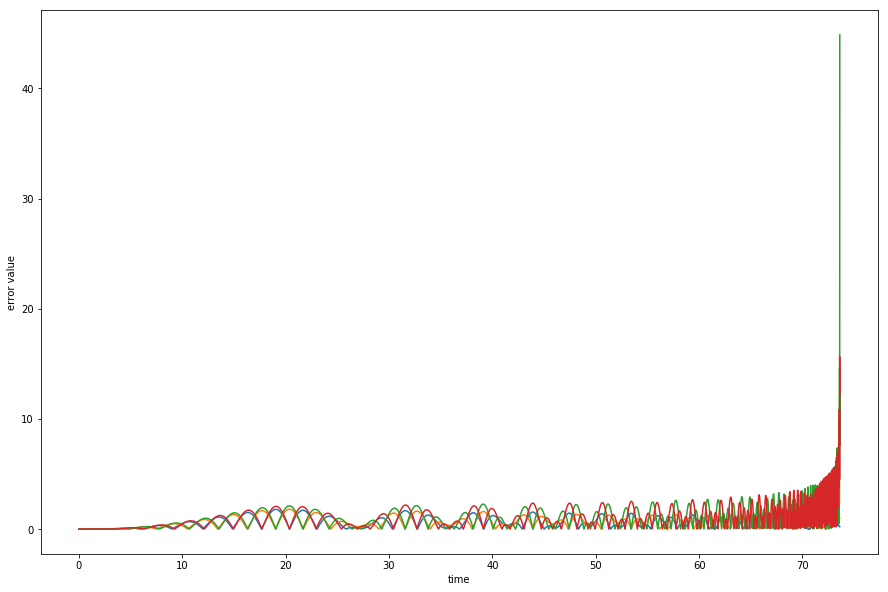

In [42]:
def multivariate_fun(t, x):
    return [x[2], x[3], - (x[0]/ (x[0]**2 + x[1]**2)**(3/2)), - (x[1]/ (x[0]**2 + x[1]**2)**(3/2))]
def exact_solution(t):
    return np.array([np.cos(t), np.sin(t), -np.sin(t), np.cos(t)])
x0 = [1,0,0,1]
t_span = (0, 100)
x = np.linspace(t_span[0], t_span[1], 10000)
numerical_solution = solve_ivp(multivariate_fun, t_span, x0, method='RK45', t_eval=x)

t = numerical_solution.t
y = numerical_solution.y
plt.figure(figsize=(15,10))
for i in range(y.shape[0]):
    plt.subplot(y.shape[0], 1, i+1)
    plt.plot(t, y[i], '-')
    plt.plot(t, exact_solution(t)[i], '-')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.legend(['numerical solution', 'exact solution'])
plt.show()

plt.figure(figsize=(15,10))
for i in range(y.shape[0]):
    error = np.abs(y[i] - exact_solution(t)[i]) #L1 error
    plt.plot(t, error,'-')

plt.xlabel('time')
plt.ylabel('error value')
plt.show()

We deal with two types of phenomena that cause error - phase shift in time and decrease in amplitude in a numerical solution.

***Exercise 3.***  
Solve the system of equations $\dot{x}(t) = \mathbf{A}x(t) $, where the matrix $\mathbf{A}$ is given by the formula:

$$\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]$$

for $x(0)=[0, 3]^T$

Draw a graph of the numerical solutions obtained. What is the exact solution of this equation?

Exact solution for eqution like $ \dot{x} = Ax $ with given x(0) is:
$$ x(t) = e^{At} x(0)$$

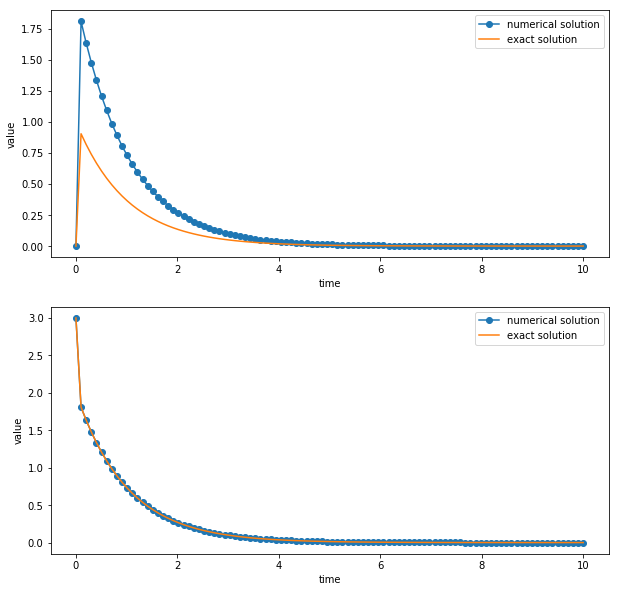

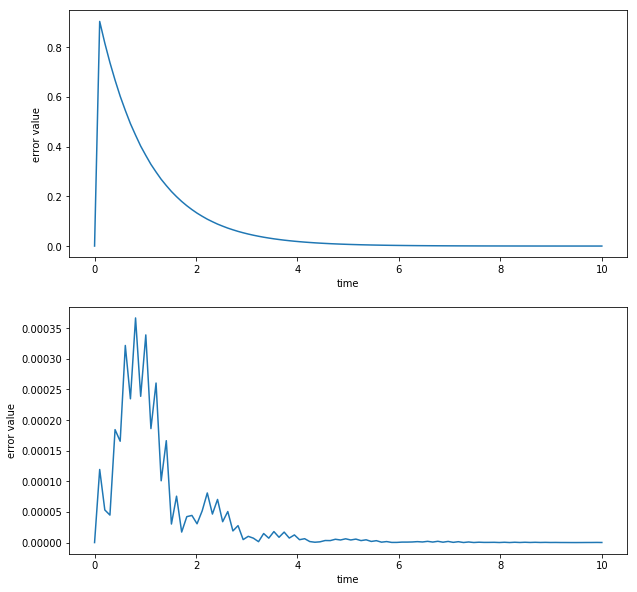

In [35]:
from scipy.linalg import expm
A = np.array([[-667, 333], [666,-334]])
def matrix_fun(t, x):
    return [x @ A]
def exact_solution(t_list, x0):
    return np.array([expm(t*A) @ x0 for t in t_list])
x0 = np.array([0,3])
t_span = (0, 10)
x = np.linspace(t_span[0], t_span[1], 100)
numerical_solution = solve_ivp(matrix_fun, t_span, x0, method='RK45', t_eval=x)
t = numerical_solution.t
y = numerical_solution.y
plt.figure(figsize=(10,10))
for i in range(y.shape[0]):
    plt.subplot(y.shape[0], 1, i+1)
    plt.plot(t, y[i], 'o-')
    plt.plot(t, exact_solution(t, x0)[:,i], '-')
    plt.xlabel('time')
    plt.ylabel('value')
    plt.legend(['numerical solution', 'exact solution'])
plt.show()

plt.figure(figsize=(10,10))
for i in range(y.shape[0]):
    plt.subplot(y.shape[0], 1, i+1)
    error = np.abs(y[i] - exact_solution(t, x0)[:,i]) #L1 error
    plt.plot(t, error,'-')

    plt.xlabel('time')
    plt.ylabel('error value')
plt.show()

Supplementary materials:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Uncle  Google](https://google.pl) i [auntie Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)